In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df = df[(df['iso_code']=='FRA') | (df['iso_code']=='GBR') | (df['iso_code']=='ITA')|
        (df['iso_code']=='CHE') | (df['iso_code']=='DEU') | (df['iso_code']=='PRT') | (df['iso_code']=='BEL')]

In [4]:
df = df[(df['date'] >= '2020-03-15') & (df['date'] <= '2020-11-09')]

In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
4997,BEL,Europe,Belgium,2020-03-15,1541.0,179.0,171.143,13.0,5.0,1.857,...,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.916
4998,BEL,Europe,Belgium,2020-03-16,1755.0,214.0,192.571,19.0,6.0,2.714,...,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.916
4999,BEL,Europe,Belgium,2020-03-17,2142.0,387.0,234.429,30.0,11.0,4.143,...,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.916
5000,BEL,Europe,Belgium,2020-03-18,2564.0,422.0,280.571,40.0,10.0,5.571,...,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.916
5001,BEL,Europe,Belgium,2020-03-19,3098.0,534.0,332.000,62.0,22.0,8.286,...,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.64,81.63,0.916


In [6]:
dfSub = df[['location', 'date','new_cases','population', 'population_density']]

In [7]:
A = dfSub[dfSub['location']!='France']

In [8]:
A = A[['location','new_cases','population']]

In [9]:
germ = A[A['location']=='Germany'].reset_index().drop('index',axis=1)
ita = A[A['location']=='Italy'].reset_index().drop('index',axis=1)
port = A[A['location']=='Portugal'].reset_index().drop('index',axis=1)
swi = A[A['location']=='Switzerland'].reset_index().drop('index',axis=1)
unk = A[A['location']=='United Kingdom'].reset_index().drop('index',axis=1)
bel  = A[A['location']=='Belgium'].reset_index().drop('index',axis=1)

In [10]:
N = pd.DataFrame(columns=['Italy'],index = range(0,240))
N['United Kingdom'] = unk['new_cases']
N['Italy']= ita['new_cases']
#N['Portugal'] = port['new_cases']
#N['Switzerland'] = swi['new_cases']
#N['Germany'] = germ['new_cases']
N['Belgium']= bel['new_cases']
N

,Italy,United Kingdom,Belgium
0,3497.0,478.0,179.0
1,2823.0,361.0,214.0
2,4000.0,442.0,387.0
3,3526.0,611.0,422.0
4,4207.0,769.0,534.0
...,...,...,...
235,30548.0,25177.0,9057.0
236,34502.0,24138.0,7411.0
237,37802.0,23287.0,6047.0
238,39809.0,24957.0,NaN


In [11]:
#correcting NaN values:
N['Belgium'].iloc[238] = N['Belgium'].iloc[237]
N['Belgium'].iloc[239] = N['Belgium'].iloc[237]
N


,Italy,United Kingdom,Belgium
0,3497.0,478.0,179.0
1,2823.0,361.0,214.0
2,4000.0,442.0,387.0
3,3526.0,611.0,422.0
4,4207.0,769.0,534.0
...,...,...,...
235,30548.0,25177.0,9057.0
236,34502.0,24138.0,7411.0
237,37802.0,23287.0,6047.0
238,39809.0,24957.0,6047.0


In [12]:
A = N.to_numpy()


In [13]:
b = dfSub[dfSub['location']=='France']

In [14]:
b = b[['new_cases']]

In [15]:
b=b.to_numpy() 
for i in range(0,240): ## correct corrupted data.  
    if b[i] == 0:
        b[i]= b[i-1]
    elif b[i]<0:
        b[i]= -b[i]


In [16]:
A_train = A[:220]
b_train = b[:220]
A_test = A[220:] 
b_test = b[220:]

In [17]:
 x = (np.linalg.inv((A_train.transpose()@A_train)))@A_train.transpose()@b_train
    ##minimization (by def), using train only

In [18]:
x 

array([[0.41421485],
       [0.86787094],
       [0.3041958 ]])

In [19]:
predictions = A_test@x


In [20]:
 r=predictions - b_test

np.linalg.norm(r)

73500.42783145294

[Text(0.5, 0, 'new cases'), Text(0.5, 1.0, 'error distribution')]

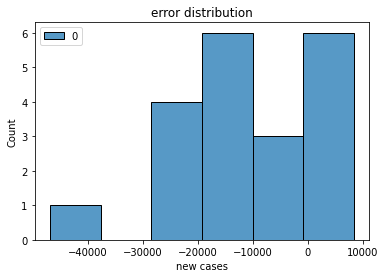

In [21]:
sns.histplot(r).set(xlabel='new cases', title = 'error distribution')

In [22]:
def Atest(index):
    return predictions[index]
def Btest(index):
    return b_test[index]

days = range(0,20)

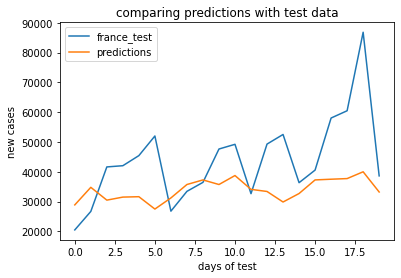

In [23]:
plt.figure()
plt.plot(days,Btest(days))
plt.plot(days,Atest(days))
plt.xlabel('days of test')
plt.ylabel('new cases')
plt.title('comparing predictions with test data')
plt.legend(['france_test','predictions'])


In [24]:
W= np.eye(220)
for i in range (0,40):
    W[i][i] = 0.3




In [25]:
x_weight = np.linalg.inv(A_train.transpose()@W@A_train)@A_train.transpose()@W@b_train

In [26]:
predictions2 = A_test@x_weight

In [27]:
def A2test(index):
    return predictions2[index]

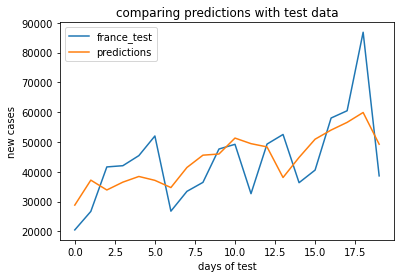

In [28]:
plt.figure()
plt.plot(days,Btest(days))
plt.plot(days,A2test(days))
plt.xlabel('days of test')
plt.ylabel('new cases')
plt.title('comparing predictions with test data')
plt.legend(['france_test','predictions'])

In [29]:
 r2=predictions2 - b_test

np.linalg.norm(r2)

47970.25356215737

[Text(0.5, 0, 'new cases'), Text(0.5, 1.0, 'error distribution')]

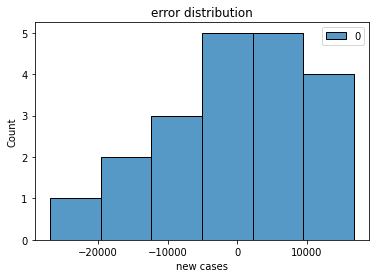

In [30]:
sns.histplot(r2).set(xlabel='new cases', title = 'error distribution')